<br>

## Final project preliminaries

<font color="Teal"><b>Exploring how much an idea "pushes back" - including its technologies, libraries, and online resources ...</b></font>



<br>

#### Here are the  [cs35 project guidelines](https://docs.google.com/document/d/1DwoOJCy6GGECvzSOE4BDPVcEgVtvChglnz03-uxx7mA/edit)  with more details.

And here is the [Colab version](https://colab.research.google.com/drive/1kASM8K0vqu40S5xjBS-hXf-bIDcQPZtz#scrollTo=1gAMoA_KN5L0) of this notebook. If Colab works better for your project, wonderful!

<br>


#### **What you've tried**
+ What are the things you've tried <b><u>so far</u></b> - and how has it gone?  
  + This is the most important effort!  
  + <b>Note</b>: If you have _lots_ of ideas and can't decide... look for online guides or walkthroughs for several of them and see which are most promising (and interesting!)
  + include, here in the Python cells above/below, the explorations and/or experiments you've pursued
  + if you're using plain-python files or other notebook files, submit those, in addition or instead
    + <font size="-2">if you submit other files instead, include these reflections in the files you submit...</font>
  + include any other <i>small</i> data files/links/resources you've collected
<br>
<br>

#### **Your Project Plan,** <font size="-1">as of this moment...</font>

+ <b><font color="DodgerBlue">Share</font></b> a paragraph or so on your project exploration so far -- and your summary of the idea/plan + its background
  + This is intentionally ***progress-first***
  + **Try things out** before dedicating too much to a single, specific path...

  I have looked through and run example code from scikit-image that displays microscopy images, segments nuceli within cells and quantifies colocalization of two cellular components using varying metrics. I have applied this knowledge to my own data from research I conducted this summer, looking at multi-dimensional nd2 images which have a number of fluorescence channels and fields of view. I have successfully displayed individual channels from fluorescence images and overlayed two channels to look at colocalization. In addition, I have worked at looking into ways to adjust image contrast and thresholding in order to improve segmentation of nuclei and proteins/nucelic acids in my own images. I successfully ran code to segment nuclei on my own images. 

  The summary of my goal for my project is to explore what I can do using scikit-image to analyze example fluorescence images that I have from reserach I conducted this summer. My total goals will be to adjust thresholding of images, segment cells/nuclei, count cells in larger image with many cells, and display and quantify colocalization. This project connects most closely to our work in class on data visualization, so along with the data visualization involved in just processing and displaying image data in plots, I would like to create additional plots comparing the colocalization quantifications that I will perform. 


+ <b><font color="Coral">Share</font></b>: &nbsp; What resources/libraries/walkthroughs have you found?

The main libraries I will be using here are scikit-image, matplotlib, nd2 and numpy. 

Here are a number of resources from scikit-image which may be helpful for looking into colocalization, cell/nuclei segmentation and thresholding. 

https://scikit-image.org/docs/0.25.x/auto_examples/applications/plot_colocalization_metrics.html#sphx-glr-auto-examples-applications-plot-colocalization-metrics-py
https://scikit-image.org/docs/0.25.x/auto_examples/segmentation/plot_watershed.html#sphx-glr-auto-examples-segmentation-plot-watershed-py
https://scikit-image.org/docs/0.25.x/auto_examples/applications/plot_fluorescence_nuclear_envelope.html
https://scikit-image.org/docs/0.25.x/auto_examples/applications/plot_human_mitosis.html
https://scikit-image.org/docs/0.25.x/auto_examples/applications/plot_thresholding_guide.html

+ <b><font color="Coral">Share</font></b>: &nbsp; What datasets are you using? <font size="-1">if applicable for your project</font>

I will be using my own data from this summer looking at fluorescence images of cells which include channels for brightfield images, a nuclear stain, fluorescent DNA, and fluorescent protein cargo of two types. These are nd2 files. 

<br>
<br>

#### **Looking ahead**
+ Specifically, what task do you plan to try <b><u>next</u></b>?
+ More generally, how do you plan to go _beyond_ existing resources...
  + If it's not shared above, describe how you envision _personalizing_ and/or _individualizing_ your project...

  I plan to continue working on thresholding images to improve segmentation. Once this is done I will be able to work towards quantification of colocalization using my images. 

  I plan to go beyond existing resources by combining the resources I have found from scikit-image with the nd2 library, as the nd2 fluorescence image datatype is not the data form of these examples. In addition, I hope to go beyond merely displaying images by creating several figures of my own that will quantify the colocalization of the various fluorescent compounds in my images. 

  This project is individualized to me as I am using my own data from this summer which I had not previously been able to analyze using Python, just display. 

<br><br>
<hr>
<br><br>

Feel free to use this notebook to summarize your prelimiaries so far ...

<br>

... ***or*** &nbsp;&nbsp; include your responses to these questions in other  notebooks or plain-python files!

<br><br>
<hr>
<br><br>

In [1]:
#
#  Feel free to interleave markdown or plain-text throughout...
#
#       If your project doesn't work well with notebooks, plain-python is 100% ok.
#

#### **Running SciKit-Image Example:** Protein-Nucleus Colocalization Using Segmentation, Protein-Protein Colocalization Using Correlation

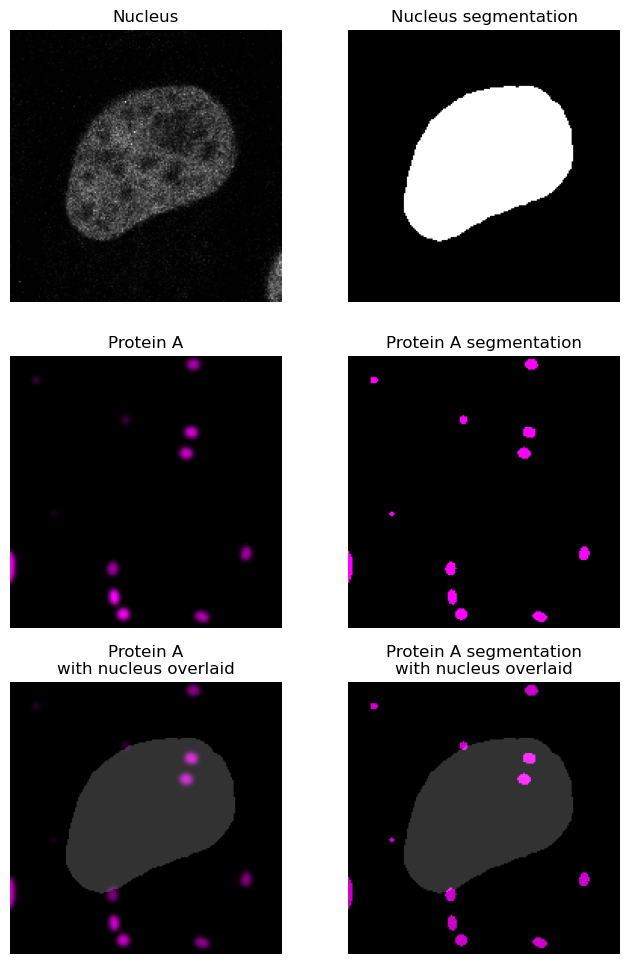

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from scipy import ndimage as ndi
import skimage as ski
import pooch

rng = np.random.default_rng()

# segment nucleus
nucleus = ski.data.protein_transport()[0, 0, :, :180]
smooth = ski.filters.gaussian(nucleus, sigma=1.5)
thresh = smooth > ski.filters.threshold_otsu(smooth)
fill = ndi.binary_fill_holes(thresh)
nucleus_seg = ski.segmentation.clear_border(fill)

# protein blobs of varying intensity
proteinA = np.zeros_like(nucleus, dtype="float64")
proteinA_seg = np.zeros_like(nucleus, dtype="float64")

for blob_seed in range(10):
    blobs = ski.data.binary_blobs(
        180, blob_size_fraction=0.5, volume_fraction=(50 / (180**2)), rng=blob_seed
    )
    blobs_image = ski.filters.gaussian(blobs, sigma=1.5) * rng.integers(50, 256)
    proteinA += blobs_image
    proteinA_seg += blobs

# plot data
fig, ax = plt.subplots(3, 2, figsize=(8, 12), sharey=True)
ax[0, 0].imshow(nucleus, cmap=plt.cm.gray)
ax[0, 0].set_title('Nucleus')

ax[0, 1].imshow(nucleus_seg, cmap=plt.cm.gray)
ax[0, 1].set_title('Nucleus segmentation')

black_magenta = LinearSegmentedColormap.from_list("", ["black", "magenta"])
ax[1, 0].imshow(proteinA, cmap=black_magenta)
ax[1, 0].set_title('Protein A')

ax[1, 1].imshow(proteinA_seg, cmap=black_magenta)
ax[1, 1].set_title('Protein A segmentation')

ax[2, 0].imshow(proteinA, cmap=black_magenta)
ax[2, 0].imshow(nucleus_seg, cmap=plt.cm.gray, alpha=0.2)
ax[2, 0].set_title('Protein A\nwith nucleus overlaid')

ax[2, 1].imshow(proteinA_seg, cmap=black_magenta)
ax[2, 1].imshow(nucleus_seg, cmap=plt.cm.gray, alpha=0.2)
ax[2, 1].set_title('Protein A segmentation\nwith nucleus overlaid')

for a in ax.ravel():
    a.set_axis_off()

In [3]:
ski.measure.intersection_coeff(proteinA_seg, nucleus_seg)

0.22

In [4]:
ski.measure.manders_coloc_coeff(proteinA, nucleus_seg)

0.23398104368931583

Text(0, 0.5, 'Protein B intensity')

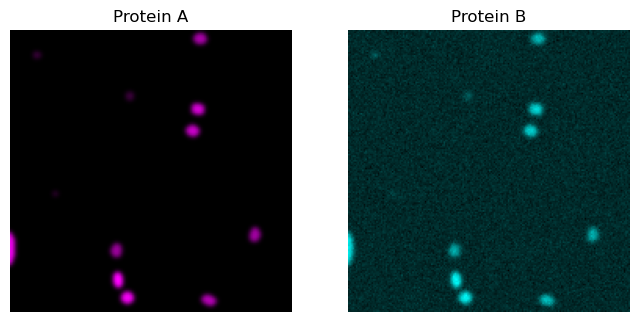

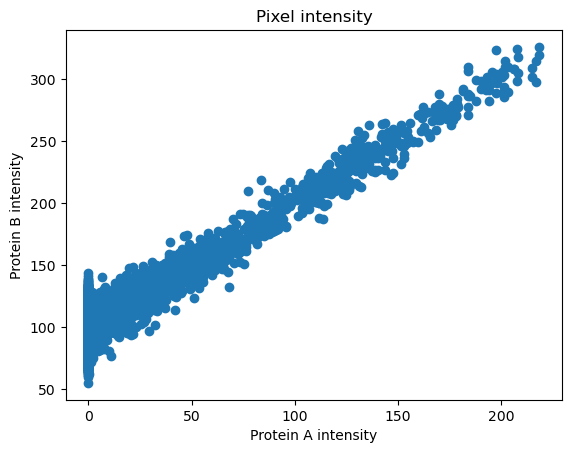

In [5]:
# generating protein B data that is correlated to protein A for demo
proteinB = proteinA + rng.normal(loc=100, scale=10, size=proteinA.shape)

# plot images
fig, ax = plt.subplots(1, 2, figsize=(8, 8), sharey=True)

ax[0].imshow(proteinA, cmap=black_magenta)
ax[0].set_title('Protein A')

black_cyan = LinearSegmentedColormap.from_list("", ["black", "cyan"])
ax[1].imshow(proteinB, cmap=black_cyan)
ax[1].set_title('Protein B')

for a in ax.ravel():
    a.set_axis_off()

# plot pixel intensity scatter
fig, ax = plt.subplots()
ax.scatter(proteinA, proteinB)
ax.set_title('Pixel intensity')
ax.set_xlabel('Protein A intensity')
ax.set_ylabel('Protein B intensity')

In [6]:
pcc, pval = ski.measure.pearson_corr_coeff(proteinA, proteinB)
print(f"PCC: {pcc:0.3g}, p-val: {pval:0.3g}")

PCC: 0.854, p-val: 0


#### **Loading my own images**

In [7]:
import itertools
from pathlib import Path
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nd2
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")

In [8]:
conditions = [
    #"07_19_TFX_dextran_transferrin",
    "07_19_TFX_dextran_transferrin_40x"
]

im_pool = dict()
fovs = [
    [0, 2, 4, 6, 8],
    [0, 2, 4, 6, 8]
]

for i, cond in enumerate(tqdm(conditions)):
    im_file = list(dir.glob(f"{cond}.nd2"))[0]
    with nd2.ND2File(im_file) as im:
        im = np.array(im)
        print(im.shape)
        im_pool[cond + "_DMSO"] = [np.array(im[fovs[i][0], j])[950:1100, 1150:1300] for j in range(0, 5)]
        im_pool[cond + "_Okanin"] = [np.array(im[fovs[i][1], j])[670:820, 300:450] for j in range(0, 5)]
        im_pool[cond + "_SalB"] = [np.array(im[fovs[i][2], j])[600:750, 150:300] for j in range(0, 5)] #50:200, 0:150
        im_pool[cond + "_EIPA"] = [np.array(im[fovs[i][3], j])[400:550, 425:575] for j in range(0, 5)]
        im_pool[cond + "_LatA"] = [np.array(im[fovs[i][4], j])[325:475, 375:525] for j in range(0, 5)]

100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

(10, 5, 1140, 1570)


#### **Visualizing Each Channel, Overlay and Plotting Pixel Intensity Correlation Between the 561 and 488nm channels**

Loaded image with shape: (10, 5, 1140, 1570)


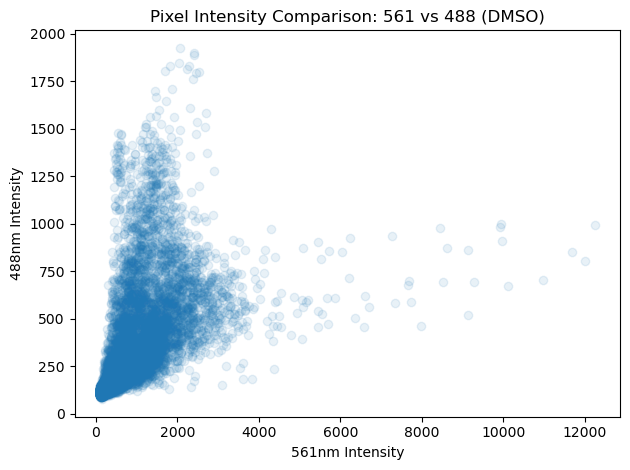

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import nd2
from pathlib import Path
from tqdm import tqdm
from matplotlib.colors import LinearSegmentedColormap

# Define your condition and Field of View (FOV) coordinates for DMSO
condition = "07_19_TFX_dextran_transferrin_40x"
fovs = [0, 2, 4, 6, 8]  # Adjust as needed

# Initialize image pool for DMSO
im_pool = dict()

# Load ND2 file for DMSO and extract the FOVs for different channels
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")  # Specify the correct directory
im_file = list(dir.glob(f"{condition}.nd2"))[0]  # Get the first matching ND2 file

with nd2.ND2File(im_file) as im:
    im = np.array(im)
    print(f"Loaded image with shape: {im.shape}")
    
    # Extract different channels from the ND2 image for DMSO
    # You will need to adjust the channel indexing based on the structure of your ND2 file
    # Assuming the channels are organized in the second dimension (axis=1)
    
    # Example: extracting channels 0, 1, 2 (assuming red, green, blue)
    # Adjust the slicing based on your ND2 data structure
    im_pool["DMSO_brightfield"] = [np.array(im[fovs[0], 0])[950:1100, 1150:1300] for fov in fovs]
    im_pool["DMSO_561"] = [np.array(im[fovs[0], 1])[950:1100, 1150:1300] for fov in fovs]
    im_pool["DMSO_405"] = [np.array(im[fovs[0], 2])[950:1100, 1150:1300] for fov in fovs]
    im_pool["DMSO_488"] = [np.array(im[fovs[0], 3])[950:1100, 1150:1300] for fov in fovs]
    im_pool["DMSO_640"] = [np.array(im[fovs[0], 4])[950:1100, 1150:1300] for fov in fovs]

# Plot the color channels
fig, ax = plt.subplots(3, 2, figsize=(10, 12), sharey=True)

# Plot Red, Green, and Blue channels for DMSO
ax[0, 0].imshow(im_pool["DMSO_brightfield"][0], cmap='gray')  # Using 'Reds' colormap for the red channel
ax[0, 0].set_title('DMSO Brightfield')

ax[0, 1].imshow(im_pool["DMSO_561"][1], cmap='inferno')  # Using 'Greens' colormap for the green channel
ax[0, 1].set_title('DMSO FluorOligo 561 nm ')

ax[1, 0].imshow(im_pool["DMSO_405"][2], cmap='inferno')  # Using 'Blues' colormap for the blue channel
ax[1, 0].set_title('DMSO Hoechst 405 nm')

ax[1, 1].imshow(im_pool["DMSO_488"][2], cmap='magma')  # Using 'Blues' colormap for the blue channel
ax[1, 1].set_title('DMSO Dextran 488 nm')

ax[2, 0].imshow(im_pool["DMSO_640"][2], cmap='viridis')  # Using 'Blues' colormap for the blue channel
ax[2, 0].set_title('DMSO Transferrin 640 nm')

# Example: Overlay all three channels (RGB) for DMSO
ax[2, 1].imshow(im_pool["DMSO_561"][1], cmap='magma')
#ax[2, 1].imshow(im_pool["DMSO_405"][2], cmap='Blues', alpha=0.5)
ax[2, 1].imshow(im_pool["DMSO_488"][3], cmap='viridis', alpha=0.5)
#ax[2, 1].imshow(im_pool["DMSO_640"][4], cmap='Oranges', alpha=0.5)
ax[2, 1].set_title('DMSO RGB Overlay - FOV 0')

# Optionally, add more FOVs or adjust for other visualizations
for a in ax.ravel():
    a.set_axis_off()

# Scatter Plot for Colocalization between Red, Green, and Blue channels (DMSO)
fig, ax = plt.subplots()

pink_channel = np.array(im_pool["DMSO_561"][1]).flatten()
blue_channel = np.array(im_pool["DMSO_405"][2]).flatten()
green_channel = np.array(im_pool["DMSO_488"][3]).flatten()
orange_channel = np.array(im_pool["DMSO_640"][3]).flatten()

# Scatter Plot comparing two channels (e.g., Red vs Green)
ax.scatter(pink_channel, green_channel, alpha=0.1, label="561 vs 488")
ax.set_title('Pixel Intensity Comparison: 561 vs 488 (DMSO)')
ax.set_xlabel('561nm Intensity')
ax.set_ylabel('488nm Intensity')

plt.tight_layout()
plt.show()

#### **Nuclear segmentation and protein segmentation on my own images**

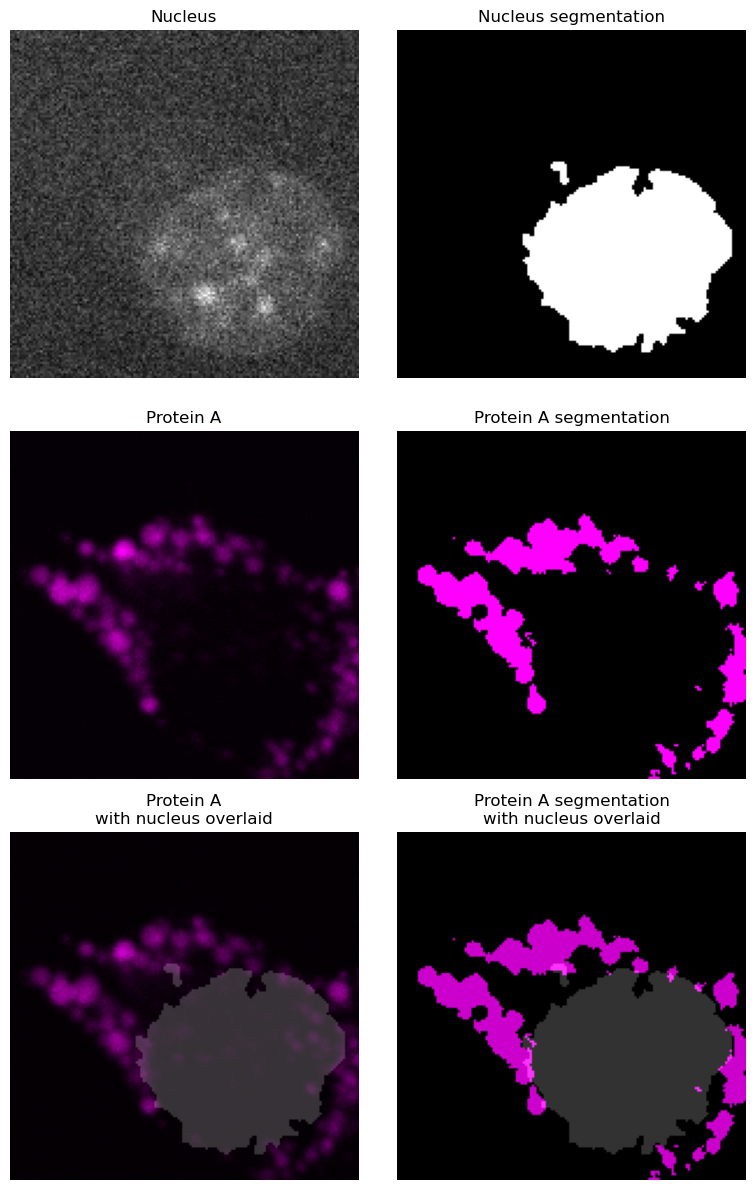

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
import scipy.ndimage as ndi
import nd2
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap

# Define your condition and Field of View (FOV) coordinates for DMSO
condition = "07_19_TFX_dextran_transferrin_40x"
fovs = [0, 2, 4, 6, 8]  # Adjust as needed

# Initialize image pool for DMSO
im_pool = dict()

# Load ND2 file for DMSO and extract the FOVs for different channels
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")  # Specify the correct directory
im_file = list(dir.glob(f"{condition}.nd2"))[0]  # Get the first matching ND2 file

with nd2.ND2File(im_file) as im:
    im = np.array(im)
    #print(f"Loaded image with shape: {im.shape}")
    
    # Extract the specific FOV and channel (assuming FOVs and channels are in the right dimensions)
    # For example, we are taking the 0th FOV and 0th channel (which could be brightfield)
    nucleus = np.array(im[fovs[0], 2])[950:1100, 1150:1300]  # Extracting a region for nucleus
    
    # Segmentation of the nucleus region
    smooth = ski.filters.gaussian(nucleus, sigma=1.5) #1.5
    thresh = smooth > ski.filters.threshold_otsu(smooth)
    fill = ndi.binary_fill_holes(thresh)
    nucleus_seg = ski.segmentation.clear_border(fill)


    # **Use Protein A Data from the ND2 File**
    proteinA = np.array(im[fovs[0], 3])[950:1100, 1150:1300]  # Extract Protein A channel (assuming it is channel 2)
    smoothProteinA = ski.filters.gaussian(proteinA, sigma=-0) #1.5
    threshProteinA = smoothProteinA > ski.filters.threshold_otsu(smoothProteinA)
    fillProteinA = ndi.binary_fill_holes(threshProteinA)
    #proteinA_seg = np.zeros_like(proteinA, dtype="float64")
    proteinA_seg = fillProteinA

    # Plot data
    fig, ax = plt.subplots(3, 2, figsize=(8, 12), sharey=True)
    
    # Display Nucleus and Segmentation
    ax[0, 0].imshow(nucleus, cmap=plt.cm.gray)
    ax[0, 0].set_title('Nucleus')

    ax[0, 1].imshow(nucleus_seg, cmap=plt.cm.gray)
    ax[0, 1].set_title('Nucleus segmentation')

    # Display Protein A and Segmentation
    black_magenta = LinearSegmentedColormap.from_list("", ["black", "magenta"])
    ax[1, 0].imshow(proteinA, cmap=black_magenta)
    ax[1, 0].set_title('Protein A')

    ax[1, 1].imshow(proteinA_seg, cmap=black_magenta)
    ax[1, 1].set_title('Protein A segmentation')

    # Overlay Nucleus segmentation on Protein A
    ax[2, 0].imshow(proteinA, cmap=black_magenta)
    ax[2, 0].imshow(nucleus_seg, cmap=plt.cm.gray, alpha=0.2)
    ax[2, 0].set_title('Protein A\nwith nucleus overlaid')

    ax[2, 1].imshow(proteinA_seg, cmap=black_magenta)
    ax[2, 1].imshow(nucleus_seg, cmap=plt.cm.gray, alpha=0.2)
    ax[2, 1].set_title('Protein A segmentation\nwith nucleus overlaid')

    # Turn off axes
    for a in ax.ravel():
        a.set_axis_off()

    plt.tight_layout()
    plt.show()


In [12]:
ski.measure.intersection_coeff(proteinA_seg, nucleus_seg)

0.03931409452112087

In [13]:
ski.measure.manders_coloc_coeff(proteinA, nucleus_seg)

0.1703933416238485

#### **Seeing if I can improve segmentation with adjusted thresholding** -- not really

Adjusted image shape: (150, 150)


(-0.5, 149.5, 149.5, -0.5)

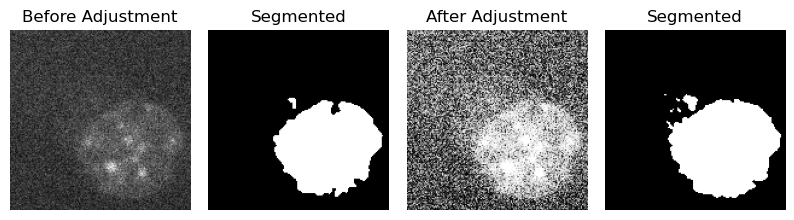

In [14]:
import numpy as np
from skimage import exposure
from pathlib import Path
import nd2  # Make sure the `nd2` module is installed

def adjust_image(im_data, fov, channel, row_slice=None, col_slice=None, adjust_thresh=[2, 98], contrast=False):
    """
    Adjusts the image by applying thresholding and contrast adjustment.
    
    Parameters:
    - im_data: The image data in a NumPy array format (loaded from ND2 file).
    - fov: The field of view to extract.
    - channel: The channel to extract (usually 0 for grayscale).
    - row_slice: Slice object for rows to crop (optional).
    - col_slice: Slice object for columns to crop (optional).
    - adjust_thresh: Threshold for contrast adjustment (default is [2, 98] percentiles).
    - contrast: Boolean to specify whether to apply contrast stretching.
    
    Returns:
    - adjusted_image: The adjusted image as a NumPy array.
    """
    # Extract the image (field of view and channel)
    image = im_data[fov, channel]

    # If row_slice and col_slice are provided, crop the image
    if row_slice and col_slice:
        image = image[row_slice, col_slice]
    elif row_slice:  # Only apply row slicing
        image = image[row_slice]
    elif col_slice:  # Only apply column slicing
        image = image[:, col_slice]

    # Apply threshold adjustment (contrast stretching)
    if adjust_thresh:
        p2, p98 = np.percentile(image, adjust_thresh)
        image = exposure.rescale_intensity(image, in_range=(p2, p98))
    
    # Apply contrast stretching (optional)
    if contrast:
        image = exposure.equalize_hist(image)  # Histological equalization for contrast adjustment
    
    # Return the adjusted image
    return image

# Example usage
conditions = ["07_19_TFX_dextran_transferrin_40x"]
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")  # Specify the correct directory

# Load ND2 file for the specified condition
im_file = list(dir.glob(f"{conditions[0]}.nd2"))[0]  # Get the first matching ND2 file

fovs = [
    [0, 2, 4, 6, 8],
    [0, 2, 4, 6, 8]
]

# Open the ND2 file and extract the image data
with nd2.ND2File(im_file) as im:
    # Convert the ND2 file to a NumPy array
    im_data = np.array(im)
    
    # Define row and column slicing parameters
    row_slice = slice(950, 1100)  # Rows 950 to 1100
    col_slice = slice(1150, 1300)  # Columns 1150 to 1300

    # Adjust image (apply thresholding and optional contrast adjustment)
    image_before_adjustment = im_data[fovs[0][0], 2][950:1100, 1150:1300]
    adjusted_image = adjust_image(im_data, fov=fovs[0][0], channel=2, row_slice=row_slice, col_slice=col_slice, contrast=True)
    
    # Display or process the adjusted image as needed
    print(f"Adjusted image shape: {adjusted_image.shape}")
    # Optionally save or visualize the adjusted image here if needed (e.g., using matplotlib)


# Create a figure to show images before and after adjustment
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Display the image before threshold adjustment
ax[0].imshow(image_before_adjustment, cmap=plt.cm.gray)
ax[0].set_title("Before Adjustment")
ax[0].axis("off")

# Segmentation of the nucleus region pre adjustment 
smooth = ski.filters.gaussian(image_before_adjustment, sigma=1.75) #1.5
thresh = smooth > ski.filters.threshold_otsu(smooth)
fill = ndi.binary_fill_holes(thresh)
nucleus_seg = ski.segmentation.clear_border(fill)
ax[1].imshow(nucleus_seg, cmap=plt.cm.gray)
ax[1].set_title("Segmented")
ax[1].axis("off")

# Display the adjusted image in the second subplot
ax[2].imshow(adjusted_image, cmap=plt.cm.gray)  # Crop the image for display
ax[2].set_title("After Adjustment")
ax[2].axis("off")

# Segmentation of the nucleus region
smooth = ski.filters.gaussian(adjusted_image, sigma=1.75) #1.5
thresh = smooth > ski.filters.threshold_otsu(smooth)
fill = ndi.binary_fill_holes(thresh)
nucleus_seg = ski.segmentation.clear_border(fill)
ax[3].imshow(nucleus_seg, cmap=plt.cm.gray)
ax[3].set_title("Segmented")
ax[3].axis("off")



Adjusted image shape: (150, 150)


(-0.5, 149.5, 149.5, -0.5)

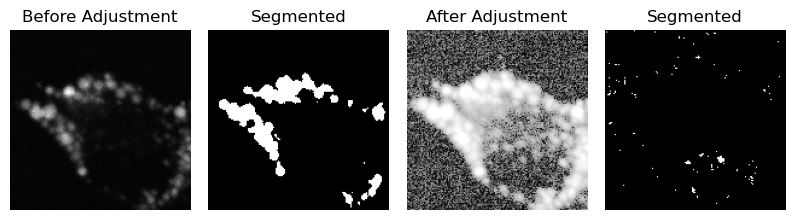

In [15]:
import numpy as np
from skimage import exposure
from pathlib import Path
import nd2  # Make sure the `nd2` module is installed


# Example usage
conditions = ["07_19_TFX_dextran_transferrin_40x"]
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")  # Specify the correct directory

# Load ND2 file for the specified condition
im_file = list(dir.glob(f"{conditions[0]}.nd2"))[0]  # Get the first matching ND2 file

fovs = [
    [0, 2, 4, 6, 8],
    [0, 2, 4, 6, 8]
]

# Open the ND2 file and extract the image data
with nd2.ND2File(im_file) as im:
    # Convert the ND2 file to a NumPy array
    im_data = np.array(im)
    
    # Define row and column slicing parameters
    row_slice = slice(950, 1100)  # Rows 950 to 1100
    col_slice = slice(1150, 1300)  # Columns 1150 to 1300

    # Adjust image (apply thresholding and optional contrast adjustment)
    image_before_adjustment = im_data[fovs[0][0], 3][950:1100, 1150:1300]
    adjusted_image = adjust_image(im_data, fov=fovs[0][0], channel=3, row_slice=row_slice, col_slice=col_slice, contrast=True)
    
    # Display or process the adjusted image as needed
    print(f"Adjusted image shape: {adjusted_image.shape}")
    # Optionally save or visualize the adjusted image here if needed (e.g., using matplotlib)


# Create a figure to show images before and after adjustment
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Display the image before threshold adjustment
ax[0].imshow(image_before_adjustment, cmap=plt.cm.gray)
ax[0].set_title("Before Adjustment")
ax[0].axis("off")

# Segmentation of the nucleus region pre adjustment 
smooth = ski.filters.gaussian(image_before_adjustment, sigma=0.5) #1.5
thresh = smooth > ski.filters.threshold_otsu(smooth)
fill = ndi.binary_fill_holes(thresh)
nucleus_seg = ski.segmentation.clear_border(fill)
ax[1].imshow(nucleus_seg, cmap=plt.cm.gray)
ax[1].set_title("Segmented")
ax[1].axis("off")

# Display the adjusted image in the second subplot
ax[2].imshow(adjusted_image, cmap=plt.cm.gray)  # Crop the image for display
ax[2].set_title("After Adjustment")
ax[2].axis("off")

# Segmentation of the nucleus region
smooth = ski.filters.gaussian(adjusted_image, sigma=0.5) #1.5
thresh = smooth > ski.filters.threshold_otsu(smooth)
fill = ndi.binary_fill_holes(thresh)
nucleus_seg = ski.segmentation.clear_border(fill)
ax[3].imshow(nucleus_seg, cmap=plt.cm.gray)
ax[3].set_title("Segmented")
ax[3].axis("off")


#### **Visualizing Protein-Protein Colocalization Using Segmentation** -- Not Too Helpful

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
import scipy.ndimage as ndi
import nd2
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap
from skimage.filters import threshold_local

# Define your condition and Field of View (FOV) coordinates for DMSO
condition = "07_19_TFX_dextran_transferrin_40x"
fovs = [0, 2, 4, 6, 8]  # Adjust as needed

# Initialize image pool for DMSO
im_pool = dict()

# Load ND2 file for DMSO and extract the FOVs for different channels
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")  # Specify the correct directory
im_file = list(dir.glob(f"{condition}.nd2"))[0]  # Get the first matching ND2 file

with nd2.ND2File(im_file) as im:
    im = np.array(im)
    #print(f"Loaded image with shape: {im.shape}")
    
    # Extract the specific FOV and channel (assuming FOVs and channels are in the right dimensions)
    # For example, we are taking the 0th FOV and 0th channel (which could be brightfield)
    nucleus = np.array(im[fovs[0], 2])[950:1100, 1150:1300]  # Extracting a region for nucleus
    
    # Segmentation of the nucleus region
    smooth = ski.filters.gaussian(nucleus, sigma=1.5) #1.5
    thresh = smooth > ski.filters.threshold_otsu(smooth)
    fill = ndi.binary_fill_holes(thresh)
    nucleus_seg = ski.segmentation.clear_border(fill)


    # **Use Protein A Data from the ND2 File**
    proteinA = np.array(im[fovs[0], 3])[950:1100, 1150:1300]  # Extract Protein A channel (assuming it is channel 2)
    #smoothProteinA = ski.filters.gaussian(proteinA, sigma=0) #1.5
    smoothProteinA = proteinA 
    threshProteinA = smoothProteinA > ski.filters.threshold_otsu(smoothProteinA)
    fillProteinA = ndi.binary_fill_holes(threshProteinA)
    #proteinA_seg = np.zeros_like(proteinA, dtype="float64")
    proteinA_seg = fillProteinA

    # **Use Protein B Data from the ND2 File**
    proteinB = np.array(im[fovs[0], 4])[950:1100, 1150:1300]  # Extract Protein A channel (assuming it is channel 2)
    #smoothProteinB = ski.filters.gaussian(proteinB, sigma=0) #1.5
    smoothProteinB = proteinB
    threshProteinB = smoothProteinB > ski.filters.threshold_otsu(smoothProteinA)
    fillProteinB = ndi.binary_fill_holes(threshProteinB)
    #proteinA_seg = np.zeros_like(proteinA, dtype="float64")
    proteinB_seg = fillProteinB

    # Plot data
    fig, ax = plt.subplots(3, 2, figsize=(8, 12), sharey=True)

    # Display Protein A and Segmentation
    black_magenta = LinearSegmentedColormap.from_list("", ["black", "magenta"])
    ax[0, 0].imshow(proteinA, cmap=black_magenta)
    ax[0, 0].set_title('Protein A')

    ax[0, 1].imshow(proteinA_seg, cmap=black_magenta)
    ax[0, 1].set_title('Protein A segmentation')

    # Display Protein B and Segmentation
    black_cyan = LinearSegmentedColormap.from_list("", ["black", "cyan"])
    ax[1, 0].imshow(proteinB, cmap=black_cyan)
    ax[1, 0].set_title('Protein B')

    ax[1, 1].imshow(proteinB_seg, cmap=black_cyan) #proteinB_seg
    ax[1, 1].set_title('Protein B segmentation')

    # Overlay Nucleus segmentation on Protein A
    ax[2, 0].imshow(proteinA, cmap=black_magenta)
    ax[2, 0].imshow(proteinB, cmap=black_cyan, alpha=0.2)
    ax[2, 0].set_title('Protein A\nwith Protein B segmentation overlaid')

    ax[2, 1].imshow(proteinA_seg, cmap=black_magenta)
    ax[2, 1].imshow(proteinB_seg, cmap=plt.cm.gray, alpha=0.2)
    ax[2, 1].set_title('Protein A segmentation\nwith protein B segmentation overlaid')

    # Turn off axes
    for a in ax.ravel():
        a.set_axis_off()

    plt.tight_layout()
    plt.show()

#### **Quantifying Protein-Protein Colocalization Using Pearson's Correlation Coefficient**

PCC: 0.833, p-val: 0


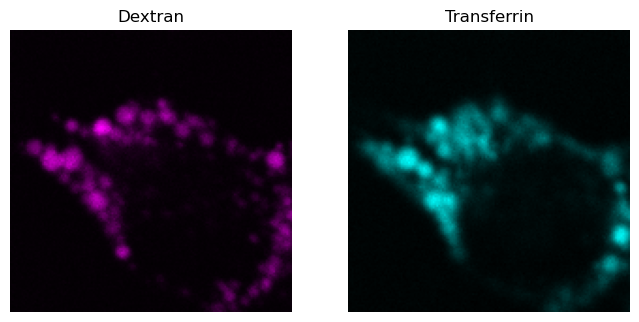

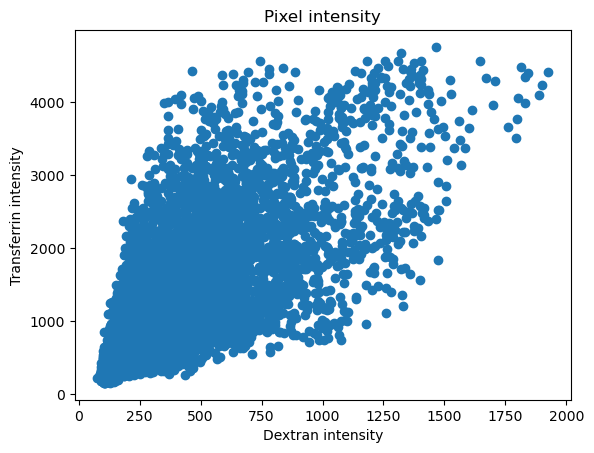

In [17]:
# loading protein data from im
proteinA = np.array(im[fovs[0], 3])[950:1100, 1150:1300]  # Extract Protein A channel (assuming it is channel 3)
proteinB = np.array(im[fovs[0], 4])[950:1100, 1150:1300]  # Extract Protein B channel (assuming it is channel 4)

# plot images
fig, ax = plt.subplots(1, 2, figsize=(8, 8), sharey=True)

ax[0].imshow(proteinA, cmap=black_magenta)
ax[0].set_title('Dextran')

black_cyan = LinearSegmentedColormap.from_list("", ["black", "cyan"])
ax[1].imshow(proteinB, cmap=black_cyan)
ax[1].set_title('Transferrin')

for a in ax.ravel():
    a.set_axis_off()

# plot pixel intensity scatter
fig, ax = plt.subplots()
ax.scatter(proteinA, proteinB)
ax.set_title('Pixel intensity')
ax.set_xlabel('Dextran intensity')
ax.set_ylabel('Transferrin intensity')

pcc, pval = ski.measure.pearson_corr_coeff(proteinA, proteinB)
print(f"PCC: {pcc:0.3g}, p-val: {pval:0.3g}")

PCC: 0.00437, p-val: 0.513


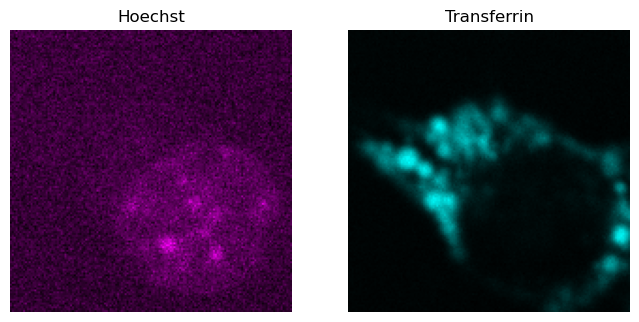

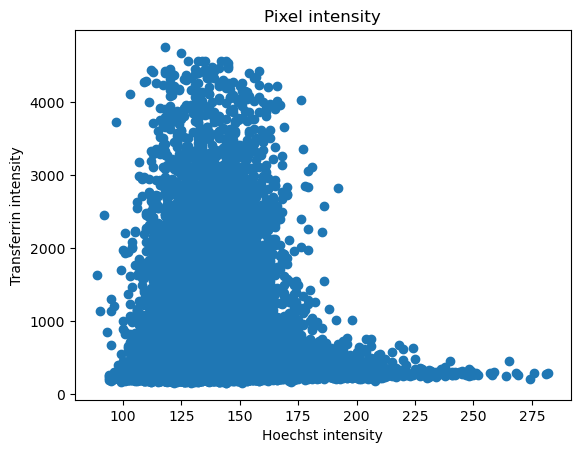

In [18]:
# loading protein data from im
proteinA = np.array(im[fovs[0], 2])[950:1100, 1150:1300]  # Extract Protein A channel (assuming it is channel 3)
proteinB = np.array(im[fovs[0], 4])[950:1100, 1150:1300]  # Extract Protein B channel (assuming it is channel 4)

# plot images
fig, ax = plt.subplots(1, 2, figsize=(8, 8), sharey=True)

ax[0].imshow(proteinA, cmap=black_magenta)
ax[0].set_title('Hoechst')

black_cyan = LinearSegmentedColormap.from_list("", ["black", "cyan"])
ax[1].imshow(proteinB, cmap=black_cyan)
ax[1].set_title('Transferrin')

for a in ax.ravel():
    a.set_axis_off()

# plot pixel intensity scatter
fig, ax = plt.subplots()
ax.scatter(proteinA, proteinB)
ax.set_title('Pixel intensity')
ax.set_xlabel('Hoechst intensity')
ax.set_ylabel('Transferrin intensity')

pcc, pval = ski.measure.pearson_corr_coeff(proteinA, proteinB)
print(f"PCC: {pcc:0.3g}, p-val: {pval:0.3g}")

PCC: -0.0142, p-val: 0.0333


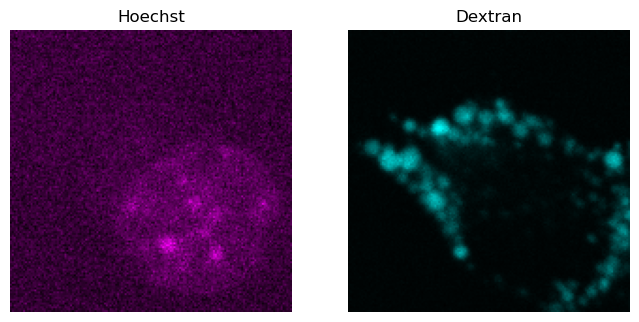

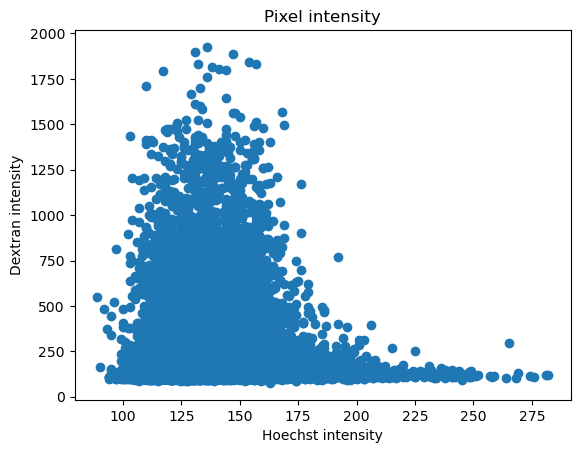

In [19]:
# loading protein data from im
proteinA = np.array(im[fovs[0], 2])[950:1100, 1150:1300]  # Extract Protein A channel (assuming it is channel 3)
proteinB = np.array(im[fovs[0], 3])[950:1100, 1150:1300]  # Extract Protein B channel (assuming it is channel 4)

# plot images
fig, ax = plt.subplots(1, 2, figsize=(8, 8), sharey=True)

ax[0].imshow(proteinA, cmap=black_magenta)
ax[0].set_title('Hoechst')

black_cyan = LinearSegmentedColormap.from_list("", ["black", "cyan"])
ax[1].imshow(proteinB, cmap=black_cyan)
ax[1].set_title('Dextran')

for a in ax.ravel():
    a.set_axis_off()

# plot pixel intensity scatter
fig, ax = plt.subplots()
ax.scatter(proteinA, proteinB)
ax.set_title('Pixel intensity')
ax.set_xlabel('Hoechst intensity')
ax.set_ylabel('Dextran intensity')

pcc, pval = ski.measure.pearson_corr_coeff(proteinA, proteinB)
print(f"PCC: {pcc:0.3g}, p-val: {pval:0.3g}")

PCC: 0.672, p-val: 0


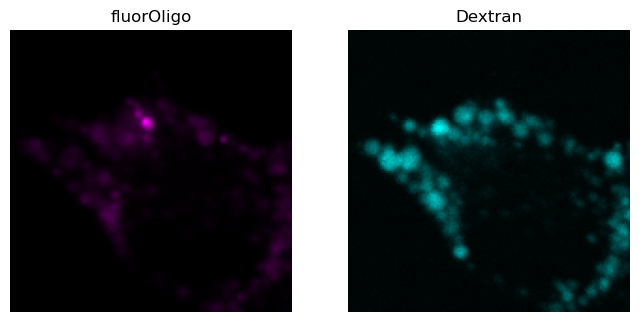

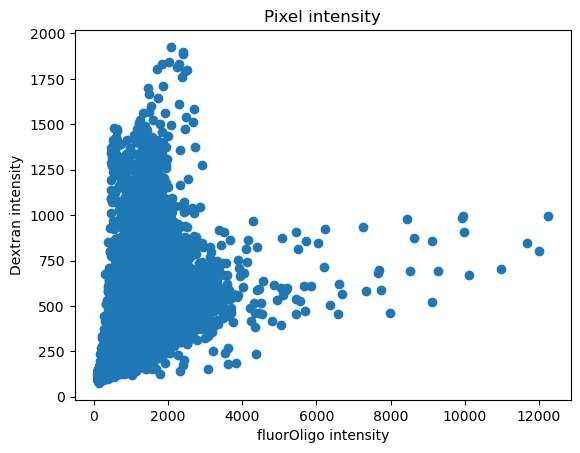

In [20]:
# loading protein data from im
proteinA = np.array(im[fovs[0], 1])[950:1100, 1150:1300]  # Extract Protein A channel (assuming it is channel 3)
proteinB = np.array(im[fovs[0], 3])[950:1100, 1150:1300]  # Extract Protein B channel (assuming it is channel 4)

# plot images
fig, ax = plt.subplots(1, 2, figsize=(8, 8), sharey=True)

ax[0].imshow(proteinA, cmap=black_magenta)
ax[0].set_title('fluorOligo')

black_cyan = LinearSegmentedColormap.from_list("", ["black", "cyan"])
ax[1].imshow(proteinB, cmap=black_cyan)
ax[1].set_title('Dextran')

for a in ax.ravel():
    a.set_axis_off()

# plot pixel intensity scatter
fig, ax = plt.subplots()
ax.scatter(proteinA, proteinB)
ax.set_title('Pixel intensity')
ax.set_xlabel('fluorOligo intensity')
ax.set_ylabel('Dextran intensity')

pcc, pval = ski.measure.pearson_corr_coeff(proteinA, proteinB)
print(f"PCC: {pcc:0.3g}, p-val: {pval:0.3g}")

PCC: 0.727, p-val: 0


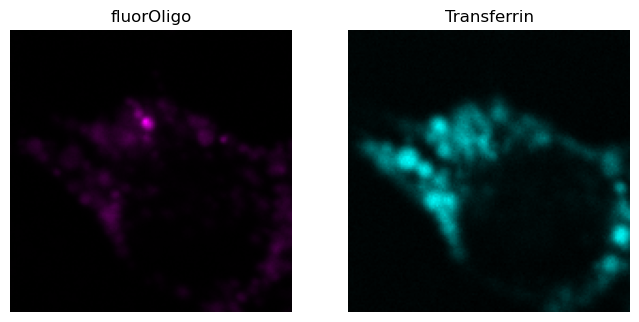

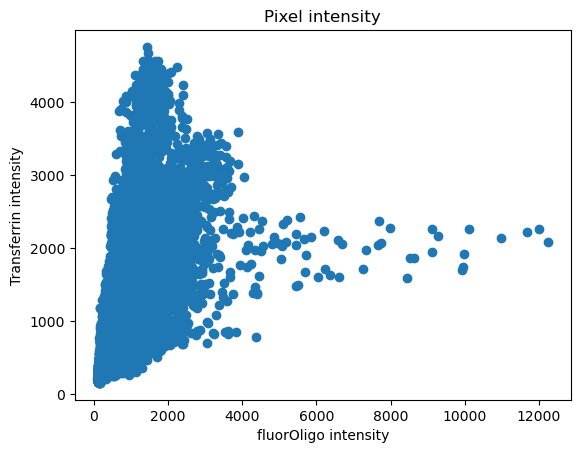

In [21]:
# loading protein data from im
proteinA = np.array(im[fovs[0], 1])[950:1100, 1150:1300]  # Extract Protein A channel (assuming it is channel 3)
proteinB = np.array(im[fovs[0], 4])[950:1100, 1150:1300]  # Extract Protein B channel (assuming it is channel 4)

# plot images
fig, ax = plt.subplots(1, 2, figsize=(8, 8), sharey=True)

ax[0].imshow(proteinA, cmap=black_magenta)
ax[0].set_title('fluorOligo')

black_cyan = LinearSegmentedColormap.from_list("", ["black", "cyan"])
ax[1].imshow(proteinB, cmap=black_cyan)
ax[1].set_title('Transferrin')

for a in ax.ravel():
    a.set_axis_off()

# plot pixel intensity scatter
fig, ax = plt.subplots()
ax.scatter(proteinA, proteinB)
ax.set_title('Pixel intensity')
ax.set_xlabel('fluorOligo intensity')
ax.set_ylabel('Transferrin intensity')

pcc, pval = ski.measure.pearson_corr_coeff(proteinA, proteinB)
print(f"PCC: {pcc:0.3g}, p-val: {pval:0.3g}")

#### **Following Example from SciKit-Image of Segmenting Cells**

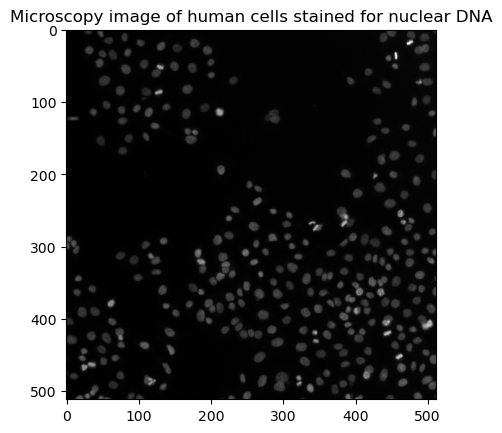

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

import skimage as ski

image = ski.data.human_mitosis()

fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')
ax.set_title('Microscopy image of human cells stained for nuclear DNA')
plt.show()

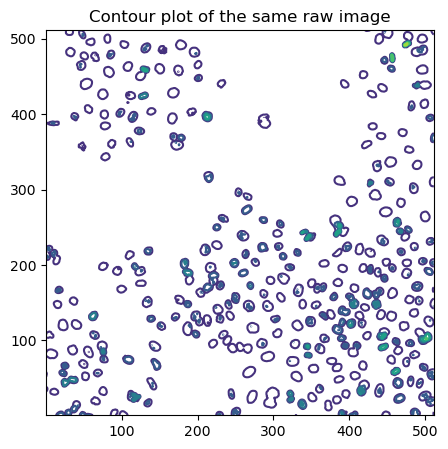

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
qcs = ax.contour(image, origin='image')
ax.set_title('Contour plot of the same raw image')
plt.show()

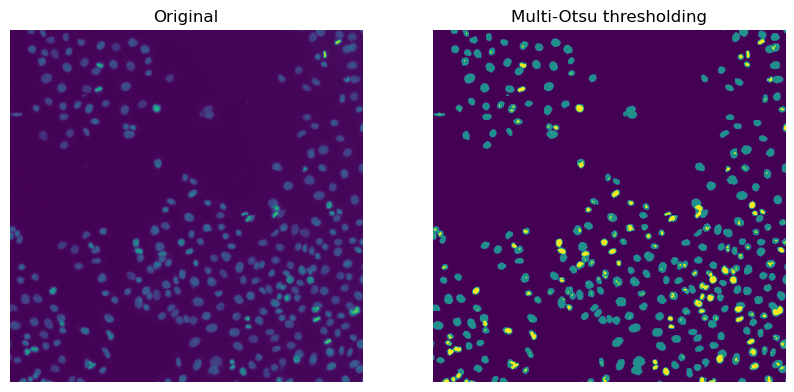

In [45]:
thresholds = ski.filters.threshold_multiotsu(image, classes=3)
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[0].set_axis_off()
ax[1].imshow(regions)
ax[1].set_title('Multi-Otsu thresholding')
ax[1].set_axis_off()
plt.show()

In [46]:
cells = image > thresholds[0]
dividing = image > thresholds[1]
labeled_cells = ski.measure.label(cells)
labeled_dividing = ski.measure.label(dividing)
naive_mi = labeled_dividing.max() / labeled_cells.max()
print(naive_mi)

0.7847222222222222


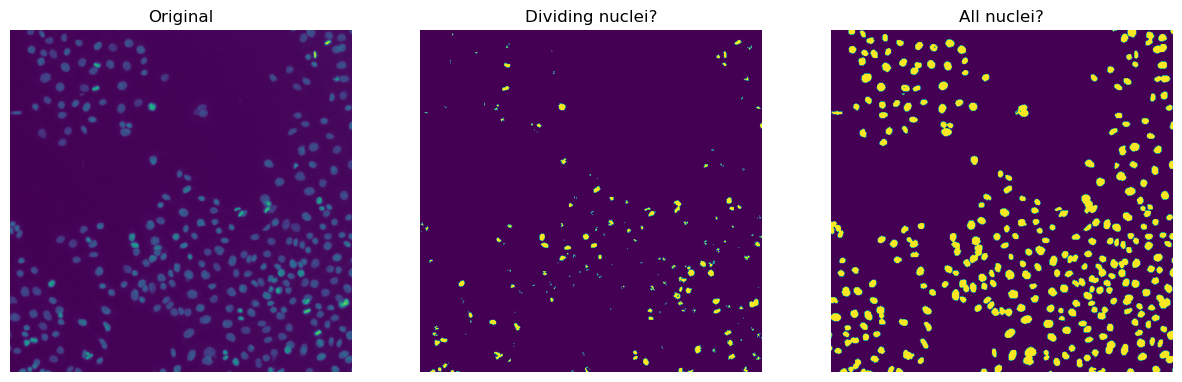

In [47]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[0].set_axis_off()
ax[1].imshow(dividing)
ax[1].set_title('Dividing nuclei?')
ax[1].set_axis_off()
ax[2].imshow(cells)
ax[2].set_title('All nuclei?')
ax[2].set_axis_off()
plt.show()

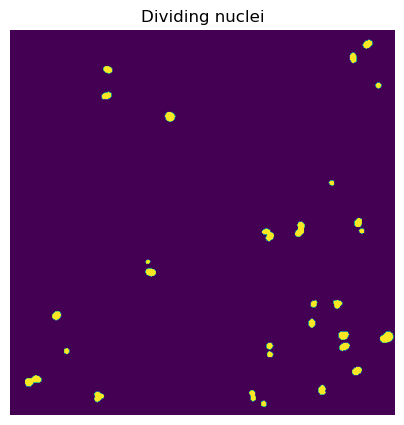

In [48]:
higher_threshold = 125
dividing = image > higher_threshold

smoother_dividing = ski.filters.rank.mean(
    ski.util.img_as_ubyte(dividing), ski.morphology.disk(4)
)

binary_smoother_dividing = smoother_dividing > 20

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(binary_smoother_dividing)
ax.set_title('Dividing nuclei')
ax.set_axis_off()
plt.show()

In [49]:
distance = ndi.distance_transform_edt(cells)

local_max_coords = ski.feature.peak_local_max(
    distance, min_distance=7, exclude_border=False
)
local_max_mask = np.zeros(distance.shape, dtype=bool)
local_max_mask[tuple(local_max_coords.T)] = True
markers = ski.measure.label(local_max_mask)

segmented_cells = ski.segmentation.watershed(-distance, markers, mask=cells)

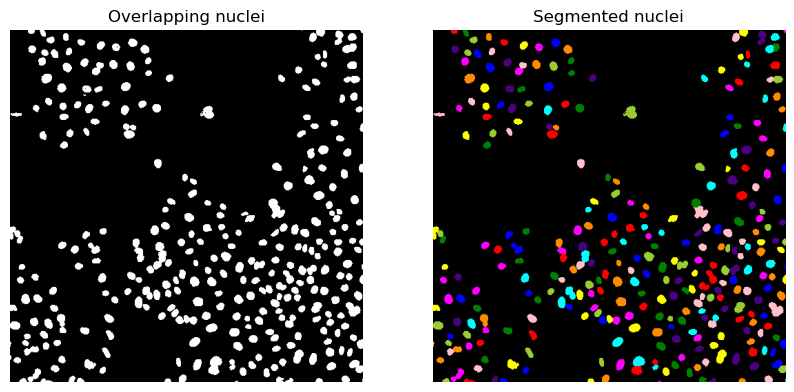

In [50]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(cells, cmap='gray')
ax[0].set_title('Overlapping nuclei')
ax[0].set_axis_off()
ax[1].imshow(ski.color.label2rgb(segmented_cells, bg_label=0))
ax[1].set_title('Segmented nuclei')
ax[1].set_axis_off()
plt.show()

#### **Counting Cell Nuclei Using Segmentation of my Own Images**

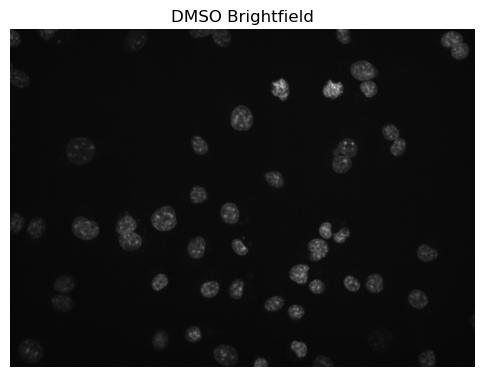

In [51]:
import matplotlib.pyplot as plt

# Define your condition and Field of View (FOV) coordinates for DMSO
condition = "07_19_TFX_dextran_transferrin_40x"
fovs = [0, 2, 4, 6, 8]  # Adjust as needed

# Initialize image pool for DMSO
im_pool = dict()

# Load ND2 file for DMSO and extract the FOVs for different channels
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")  # Specify the correct directory
im_file = list(dir.glob(f"{condition}.nd2"))[0]  # Get the first matching ND2 file

with nd2.ND2File(im_file) as im:
    im = np.array(im)
    im_pool["DMSO_405"] = [np.array(im[fovs[0], 2]) for fov in fovs]

plt.figure(figsize=(6, 6))  # Set the figure size
plt.imshow(im_pool["DMSO_405"][0], cmap='gray')  # Display the image in grayscale
plt.title('DMSO Brightfield')
plt.axis('off')  # Optional: hides the axes for a cleaner look
plt.show()



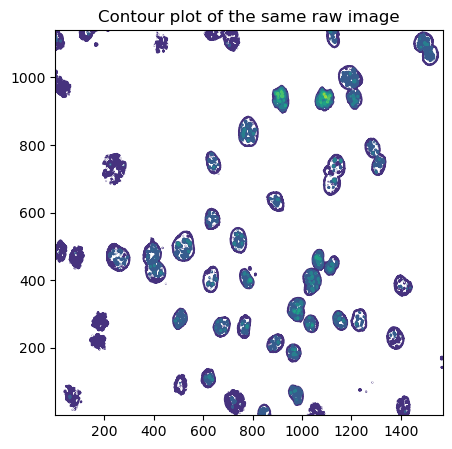

In [52]:
fig, ax = plt.subplots(figsize=(5, 5))
qcs = ax.contour(im_pool["DMSO_405"][0], origin='image')
ax.set_title('Contour plot of the same raw image')
plt.show()

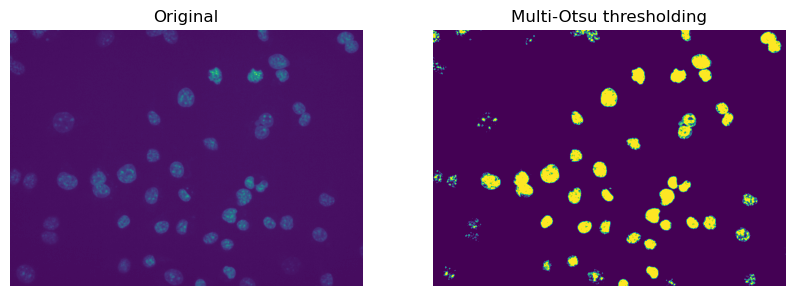

In [53]:
thresholds = ski.filters.threshold_multiotsu(im_pool["DMSO_405"][0], classes=2)
regions = np.digitize(im_pool["DMSO_405"][0], bins=thresholds)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(im_pool["DMSO_405"][0])
ax[0].set_title('Original')
ax[0].set_axis_off()
ax[1].imshow(regions)
ax[1].set_title('Multi-Otsu thresholding')
ax[1].set_axis_off()
plt.show()



In [61]:
thresholds = ski.filters.threshold_multiotsu(im_pool["DMSO_405"][0], classes=2)
regions = np.digitize(im_pool["DMSO_405"][0], bins=thresholds)
cells = im_pool["DMSO_405"][0] > thresholds[0]
labeled_cells = ski.measure.label(cells)
print(len(labeled_cells))


1140


In [62]:
from skimage.filters import sobel
import numpy as np
import skimage.io as skio
from scipy import ndimage as ndi
from skimage import segmentation, morphology
import skimage.measure as skm

def count_dapi(filepath):
    dapi_img = skio.imread(filepath, plugin='tifffile')
    imggray = dapi_img[:, :, 2]  # selects greenchannel
    #Gets elevation map
    elevation_map = sobel(imggray)
    # Array indexing, selects only elements <10 and set to value 1
    markers = np.zeros_like(imggray)
    markers[imggray < 10] = 1
    markers[imggray > 50] = 2
    #Segment from elevation map
    segmentation_img = segmentation.watershed(elevation_map, mask=markers)
    #Label area of interests
    label_cleaned = morphology.remove_small_objects(segmentation_img, 10)
    label_cleaned = ndi.binary_fill_holes(label_cleaned)
    labeled_dapi, _ = ndi.label(label_cleaned)
    cell_label = skm.regionprops(labeled_dapi)
    cell_count = len(cell_label)

    return cell_count

def est_cellcount(imagecount):
    cellpersquarecm = imagecount /0.010593
    return int(cellpersquarecm)

In [63]:
import matplotlib.pyplot as plt

# Define your condition and Field of View (FOV) coordinates for DMSO
condition = "07_19_TFX_dextran_transferrin_40x"
fovs = [0, 2, 4, 6, 8]  # Adjust as needed

# Initialize image pool for DMSO
im_pool = dict()

# Load ND2 file for DMSO and extract the FOVs for different channels
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")  # Specify the correct directory
im_file = list(dir.glob(f"{condition}.nd2"))[0]  # Get the first matching ND2 file

with nd2.ND2File(im_file) as im:
    im = np.array(im)
    im_pool["DMSO_405"] = [np.array(im[fovs[0], 2]) for fov in fovs]
imggray = im_pool["DMSO_405"][0]
elevation_map = sobel(imggray)
# Array indexing, selects only elements <10 and set to value 1
markers = np.zeros_like(imggray)
markers[imggray > 300] = 1
#Segment from elevation map
segmentation_img = segmentation.watershed(elevation_map, mask=markers)
#Label area of interests
label_cleaned = morphology.remove_small_objects(segmentation_img, 10)
label_cleaned = ndi.binary_fill_holes(label_cleaned)
#labeled_regions, num_labels = ndi.label(label_cleaned)
labeled_dapi, _ = ndi.label(label_cleaned)
cell_label = skm.regionprops(labeled_dapi)
cell_count = len(cell_label)
print(cell_count)
fig, axs = plt.subplots(1, 3, figsize=(12, 12))
axs[0].imshow(markers)
axs[1].imshow(segmentation_img)
axs[2].imshow(label_cleaned)
#plt.imshow(im_pool["DMSO_405"][0], cmap='gray')  # Display the image in grayscale
#plt.title('DMSO Brightfield')
plt.axis('off')  # Optional: hides the axes for a cleaner look
plt.show()


627


Adjusted image shape: (1140, 1570)
1140


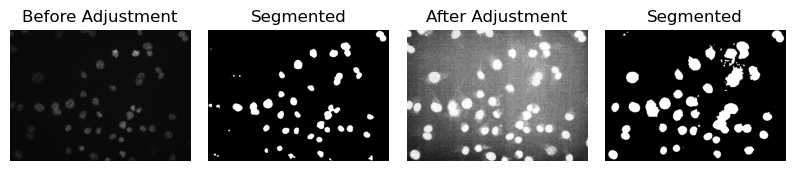

In [65]:
conditions = ["07_19_TFX_dextran_transferrin_40x"]
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")  # Specify the correct directory

# Load ND2 file for the specified condition
im_file = list(dir.glob(f"{conditions[0]}.nd2"))[0]  # Get the first matching ND2 file

fovs = [
    [0, 2, 4, 6, 8],
    [0, 2, 4, 6, 8]
]

# Open the ND2 file and extract the image data
with nd2.ND2File(im_file) as im:
    # Convert the ND2 file to a NumPy array
    im_data = np.array(im)
    
    # Define row and column slicing parameters
    row_slice = slice(950, 1100)  # Rows 950 to 1100
    col_slice = slice(1150, 1300)  # Columns 1150 to 1300

    # Adjust image (apply thresholding and optional contrast adjustment)
    image_before_adjustment = im_data[fovs[0][0], 2]
    adjusted_image = adjust_image(im_data, fov=fovs[0][0], channel=2, contrast=True)
    
    # Display or process the adjusted image as needed
    print(f"Adjusted image shape: {adjusted_image.shape}")
    # Optionally save or visualize the adjusted image here if needed (e.g., using matplotlib)


# Create a figure to show images before and after adjustment
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Display the image before threshold adjustment
ax[0].imshow(image_before_adjustment, cmap=plt.cm.gray)
ax[0].set_title("Before Adjustment")
ax[0].axis("off")

# Segmentation of the nucleus region pre adjustment 
smooth = ski.filters.gaussian(image_before_adjustment, sigma=5) #1.5
thresh = smooth > ski.filters.threshold_otsu(smooth)
fill = ndi.binary_fill_holes(thresh)
nucleus_seg = ski.segmentation.clear_border(fill)
ax[1].imshow(nucleus_seg, cmap=plt.cm.gray)
ax[1].set_title("Segmented")
ax[1].axis("off")

# Display the adjusted image in the second subplot
ax[2].imshow(adjusted_image, cmap=plt.cm.gray)  # Crop the image for display
ax[2].set_title("After Adjustment")
ax[2].axis("off")

# Segmentation of the nucleus region
smooth = ski.filters.gaussian(adjusted_image, sigma=5) #1.5
thresh = smooth > ski.filters.threshold_otsu(smooth)
fill = ndi.binary_fill_holes(thresh)
nucleus_seg = ski.segmentation.clear_border(fill)
ax[3].imshow(nucleus_seg, cmap=plt.cm.gray)
ax[3].set_title("Segmented")
ax[3].axis("off")


labeled_cells = ski.measure.label(nucleus_seg)
print(len(labeled_cells))

(-0.5, 1569.5, 1139.5, -0.5)

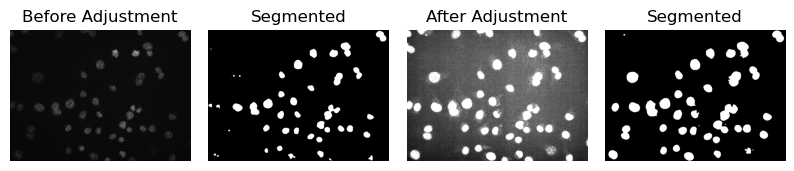

In [66]:
img = im_pool["DMSO_405"][0]

# Get the 2nd and 98th percentile of the intensity as our range.
p2, p98 = np.percentile(img, (2, 90))

img_stretch = rescale_intensity(img, in_range=(p2, p98))

# Create a figure to show images before and after adjustment
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Display the image before threshold adjustment
ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title("Before Adjustment")
ax[0].axis("off")

# Segmentation of the nucleus region pre adjustment 
smooth = ski.filters.gaussian(img, sigma=5) #1.5
thresh = smooth > ski.filters.threshold_otsu(smooth)
fill = ndi.binary_fill_holes(thresh)
nucleus_seg = ski.segmentation.clear_border(fill)
ax[1].imshow(nucleus_seg, cmap=plt.cm.gray)
ax[1].set_title("Segmented")
ax[1].axis("off")

# Display the adjusted image in the second subplot
ax[2].imshow(img_stretch, cmap=plt.cm.gray)  # Crop the image for display
ax[2].set_title("After Adjustment")
ax[2].axis("off")

# Segmentation of the nucleus region
smooth = ski.filters.gaussian(img_stretch, sigma=5) #1.5
thresh = smooth > ski.filters.threshold_otsu(smooth)
fill = ndi.binary_fill_holes(thresh)
nucleus_seg = ski.segmentation.clear_border(fill)
ax[3].imshow(nucleus_seg, cmap=plt.cm.gray)
ax[3].set_title("Segmented")
ax[3].axis("off")

(-0.5, 1569.5, 1139.5, -0.5)

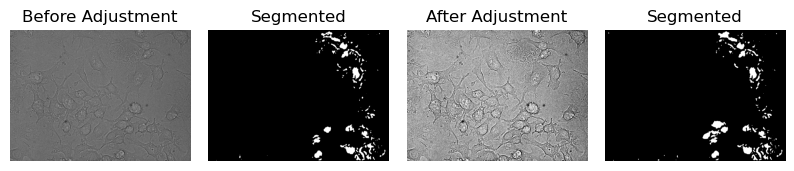

In [67]:
from skimage.exposure import rescale_intensity
# Define your condition and Field of View (FOV) coordinates for DMSO
condition = "07_19_TFX_dextran_transferrin_40x"
fovs = [0, 2, 4, 6, 8]  # Adjust as needed

# Initialize image pool for DMSO
im_pool = dict()

# Load ND2 file for DMSO and extract the FOVs for different channels
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")  # Specify the correct directory
im_file = list(dir.glob(f"{condition}.nd2"))[0]  # Get the first matching ND2 file

with nd2.ND2File(im_file) as im:
    im = np.array(im)
    img = [np.array(im[fovs[0], 0]) for fov in fovs][0]


# Get the 2nd and 98th percentile of the intensity as our range.
p2, p98 = np.percentile(img, (2, 90))

img_stretch = rescale_intensity(img, in_range=(p2, p98))

# Create a figure to show images before and after adjustment
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Display the image before threshold adjustment
ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title("Before Adjustment")
ax[0].axis("off")

# Segmentation of the nucleus region pre adjustment 
smooth = ski.filters.gaussian(img, sigma=5) #1.5
thresh = smooth > ski.filters.threshold_otsu(smooth)
fill = ndi.binary_fill_holes(thresh)
nucleus_seg = ski.segmentation.clear_border(fill)
ax[1].imshow(nucleus_seg, cmap=plt.cm.gray)
ax[1].set_title("Segmented")
ax[1].axis("off")

# Display the adjusted image in the second subplot
ax[2].imshow(img_stretch, cmap=plt.cm.gray)  # Crop the image for display
ax[2].set_title("After Adjustment")
ax[2].axis("off")

# Segmentation of the nucleus region
smooth = ski.filters.gaussian(img_stretch, sigma=5) #1.5
thresh = smooth > ski.filters.threshold_otsu(smooth)
fill = ndi.binary_fill_holes(thresh)
nucleus_seg = ski.segmentation.clear_border(fill)
ax[3].imshow(nucleus_seg, cmap=plt.cm.gray)
ax[3].set_title("Segmented")
ax[3].axis("off")

0.4144062938585913
Min pixel value: 65
Max pixel value: 1729
Min pixel value: 0
Max pixel value: 65535
Min pixel value: 0.00390705134750421
Max pixel value: 1.0
Min pixel value: False
Max pixel value: True
47


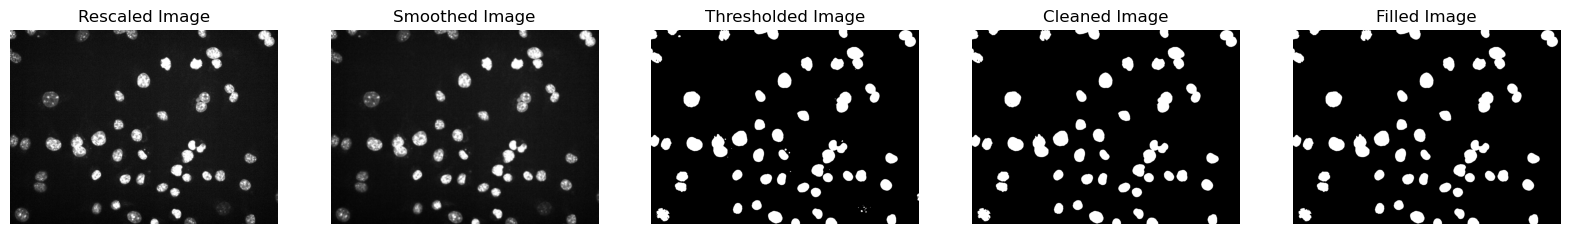

In [73]:
import numpy as np
from skimage.exposure import rescale_intensity
from scipy import ndimage as ndi
from skimage import measure
from skimage import morphology
from skimage.exposure import rescale_intensity
# Define your condition and Field of View (FOV) coordinates for DMSO
condition = "07_19_TFX_dextran_transferrin_40x"
fovs = [0, 2, 4, 6, 8]  # Adjust as needed

# Initialize image pool for DMSO
im_pool = dict()

# Load ND2 file for DMSO and extract the FOVs for different channels
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")  # Specify the correct directory
im_file = list(dir.glob(f"{condition}.nd2"))[0]  # Get the first matching ND2 file

with nd2.ND2File(im_file) as im:
    im = np.array(im)
    img = [np.array(im[fovs[0], 2]) for fov in fovs][0]

# Get the 2nd and 98th percentile of the intensity as our range.
p2, p98 = np.percentile(img, (2, 98))

img_stretch = rescale_intensity(img, in_range=(p2, p98))

# Segmentation of the nucleus region
smooth = ski.filters.gaussian(img_stretch, sigma=1.5) #1.5
print(ski.filters.threshold_otsu(smooth))
thresh = smooth > ski.filters.threshold_otsu(smooth)/2
#thresh = smooth > 0.2
cleaned = morphology.remove_small_objects(thresh, min_size=500)
fill = ndi.binary_fill_holes(cleaned)
nucleus_seg = ski.segmentation.clear_border(fill)

print("Min pixel value:", np.min(img))
print("Max pixel value:", np.max(img))
print("Min pixel value:", np.min(img_stretch))
print("Max pixel value:", np.max(img_stretch))
print("Min pixel value:", np.min(smooth))
print("Max pixel value:", np.max(smooth))
print("Min pixel value:", np.min(thresh))
print("Max pixel value:", np.max(thresh))


fig, ax = plt.subplots(1, 5, figsize=(20, 10))
ax[0].imshow(img_stretch, cmap='gray')
ax[0].set_title("Rescaled Image")
ax[0].axis("off")
ax[1].imshow(smooth, cmap='gray')
ax[1].set_title("Smoothed Image")
ax[1].axis("off")
ax[2].imshow(thresh, cmap='gray')
ax[2].set_title("Thresholded Image")
ax[2].axis("off")
ax[3].imshow(cleaned, cmap='gray')
ax[3].set_title("Cleaned Image")
ax[3].axis("off")
ax[4].imshow(fill, cmap='gray')
ax[4].set_title("Filled Image")
ax[4].axis("off")

labeled_cells, num_cells = ndi.label(fill)
print(num_cells)




In [74]:
distance = ndi.distance_transform_edt(fill)

local_max_coords = ski.feature.peak_local_max(
    distance, min_distance=10, exclude_border=False 
)
local_max_mask = np.zeros(distance.shape, dtype=bool)
local_max_mask[tuple(local_max_coords.T)] = True
markers = ski.measure.label(local_max_mask)

segmented_cells = ski.segmentation.watershed(-distance, markers, mask=fill)

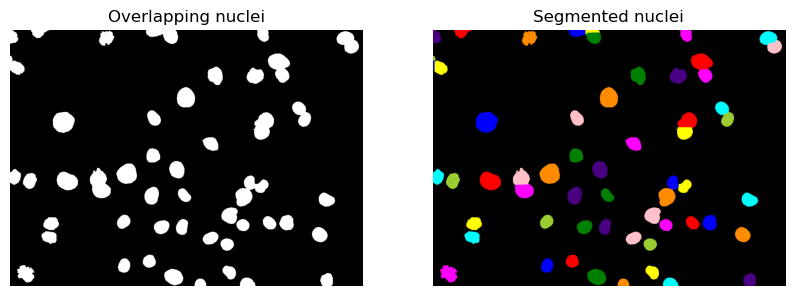

In [75]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(fill, cmap='gray')
ax[0].set_title('Overlapping nuclei')
ax[0].set_axis_off()
ax[1].imshow(ski.color.label2rgb(segmented_cells, bg_label=0))
ax[1].set_title('Segmented nuclei')
ax[1].set_axis_off()
plt.show()

In [76]:
from skimage.measure import regionprops
from skimage.measure import label 

# Label connected components
labeled_img = label(segmented_cells)

# Count unique regions (excluding background)
num_cells = np.max(labeled_img)

print(f"Number of cells: {num_cells}" + '!!!!!!!!!!!!!')

Number of cells: 58!!!!!!!!!!!!!


#### **Quantify Protein Colocalization With Nucleus Across Many Cells**

In [20]:
import numpy as np
from skimage.exposure import rescale_intensity
from scipy import ndimage as ndi
from skimage import measure
from skimage import morphology
from skimage.exposure import rescale_intensity
# Define your condition and Field of View (FOV) coordinates for DMSO
condition = "07_19_TFX_dextran_transferrin_40x"
fovs = [0, 2, 4, 6, 8]  # Adjust as needed

# Initialize image pool for DMSO
im_pool = dict()

# Load ND2 file for DMSO and extract the FOVs for different channels
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")  # Specify the correct directory

conditions = [
    #"07_19_TFX_dextran_transferrin",
    "07_19_TFX_dextran_transferrin_40x"
]

im_pool = dict()
fovs = [
    [0, 2, 4, 6, 8],
    [0, 2, 4, 6, 8]

]
for i, cond in enumerate(tqdm(conditions)):
    im_file = list(dir.glob(f"{cond}.nd2"))[0]
    with nd2.ND2File(im_file) as im:
        im = np.array(im)
        print(im.shape)
        im_pool[cond + "_DMSO"] = [np.array(im[fovs[i][0], j])[1000:2000, 1000:2000] for j in range(1, 3)]
        im_pool[cond + "_SalB"] = [np.array(im[fovs[i][1], j])[1000:2000, 1000:2000] for j in range(1, 3)]
        im_pool[cond + "_Okanin"] = [np.array(im[fovs[i][2], j])[1000:2000, 1000:2000] for j in range(1, 3)]

100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

(10, 5, 1140, 1570)


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
import scipy.ndimage as ndi
import nd2
from pathlib import Path
from matplotlib.colors import LinearSegmentedColormap
from skimage.filters import threshold_local

condition = "07_19_TFX_dextran_transferrin_40x"
fovs = [0, 2, 4, 6, 8]  # Adjust as needed

# Initialize image pool for DMSO
im_pool = dict()

# Load ND2 file for DMSO and extract the FOVs for different channels
dir = Path("/Users/isabelburger/Documents/Previous Research/Amgen/Data/07_19")  # Specify the correct directory

conditions = [
    #"07_19_TFX_dextran_transferrin",
    "07_19_TFX_dextran_transferrin_40x"
]

im_pool = dict()
fovs = [
    [0, 2, 4, 6, 8],
    [0, 2, 4, 6, 8]

]
for i, cond in enumerate(tqdm(conditions)):
    im_file = list(dir.glob(f"{cond}.nd2"))[0]

with nd2.ND2File(im_file) as im:
    
    im = np.array(im)
    img = [np.array(im[fovs[0], 2]) for fov in fovs][0]
    #print(f"Loaded image with shape: {im.shape}")


# Get the 2nd and 98th percentile of the intensity as our range.
p2, p98 = np.percentile(img, (2, 98))

img_stretch = rescale_intensity(img, in_range=(p2, p98))

# Segmentation of the nucleus region
smooth = ski.filters.gaussian(img_stretch, sigma=1.5) #1.5
print(ski.filters.threshold_otsu(smooth))
thresh = smooth > ski.filters.threshold_otsu(smooth)/2
#thresh = smooth > 0.2
cleaned = morphology.remove_small_objects(thresh, min_size=500)
fill = ndi.binary_fill_holes(cleaned)
nucleus_seg = ski.segmentation.clear_border(fill)

# Extract the specific FOV and channel (assuming FOVs and channels are in the right dimensions)
# For example, we are taking the 0th FOV and 0th channel (which could be brightfield)
# nucleus = np.array(im[fovs[0], 2])[950:1100, 1150:1300]  # Extracting a region for nucleus

# # Segmentation of the nucleus region
# smooth = ski.filters.gaussian(nucleus, sigma=1.5) #1.5
# thresh = smooth > ski.filters.threshold_otsu(smooth)
# fill = ndi.binary_fill_holes(thresh)
# nucleus_seg = ski.segmentation.clear_border(fill)



# **Use Protein A Data from the ND2 File**
proteinA = np.array(im[fovs[0], 3])[950:1100, 1150:1300]  # Extract Protein A channel (assuming it is channel 2)
#smoothProteinA = ski.filters.gaussian(proteinA, sigma=0) #1.5
smoothProteinA = proteinA 
threshProteinA = smoothProteinA > ski.filters.threshold_otsu(smoothProteinA)/2
fillProteinA = ndi.binary_fill_holes(threshProteinA)
#proteinA_seg = np.zeros_like(proteinA, dtype="float64")
proteinA_seg = fillProteinA

# **Use Protein B Data from the ND2 File**
proteinB = np.array(im[fovs[0], 4])[950:1100, 1150:1300]  # Extract Protein A channel (assuming it is channel 2)
#smoothProteinB = ski.filters.gaussian(proteinB, sigma=0) #1.5
smoothProteinB = proteinB
threshProteinB = smoothProteinB > ski.filters.threshold_otsu(smoothProteinA)
fillProteinB = ndi.binary_fill_holes(threshProteinB)
#proteinA_seg = np.zeros_like(proteinA, dtype="float64")
proteinB_seg = fillProteinB

# Plot data
fig, ax = plt.subplots(3, 2, figsize=(8, 12), sharey=True)

# Display Protein A and Segmentation
black_magenta = LinearSegmentedColormap.from_list("", ["black", "magenta"])
ax[0, 0].imshow(proteinA, cmap=black_magenta)
ax[0, 0].set_title('Protein A')

ax[0, 1].imshow(proteinA_seg, cmap=black_magenta)
ax[0, 1].set_title('Protein A segmentation')

# Display Protein B and Segmentation
black_cyan = LinearSegmentedColormap.from_list("", ["black", "cyan"])
ax[1, 0].imshow(proteinB, cmap=black_cyan)
ax[1, 0].set_title('Protein B')

ax[1, 1].imshow(proteinB_seg, cmap=black_cyan) #proteinB_seg
ax[1, 1].set_title('Protein B segmentation')

# Overlay Nucleus segmentation on Protein A
ax[2, 0].imshow(proteinA, cmap=black_magenta)
ax[2, 0].imshow(proteinB, cmap=black_cyan, alpha=0.2)
ax[2, 0].set_title('Protein A\nwith Protein B segmentation overlaid')

ax[2, 1].imshow(proteinA_seg, cmap=black_magenta)
ax[2, 1].imshow(proteinB_seg, cmap=plt.cm.gray, alpha=0.2)
ax[2, 1].set_title('Protein A segmentation\nwith protein B segmentation overlaid')

# Turn off axes
for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

100%|██████████| 1/1 [00:00<00:00, 896.03it/s]


0.24439020695664782


IndexError: index 0 is out of bounds for axis 0 with size 0

## **Reflection and Next Steps** 

additional progress exploring your final project ideas and possibilities
a short reflection -- one-to-two paragraphs -- of how the exploration is going
include your current idea for the final project (let's call this "the idea")
also, include a short bullet list of your goals for the next week!

#### The Idea

My project idea is to apply image analysis and data visualization techniques to my own fluorescence microscopy images from research I conducted this summer in order to quantify colocalization of proteins. This involves thresholding and segmenting image data using otsu thresholding and watershed segmentation, analyzing the binary image data using tools from scikit-image, and then visualizing that data using matplotlib. 

### Additional progress on final project: 
- Quantified colocalization of several proteins by calculating Pearson's correlation coefficient 
- Improved thresholding by lowering cutoff to 1/2 of Otsu threshold value
- Thresholded and cleaned image into a segmented binary image 
- Used watershed segmentation on segmented binary image to detect all cells, even those with adjacent or overlapping nuclei 
- Extracted cell number from segmented binary image using skimage.measure label feature 

### Reflection: 

I think the exploration is going pretty well. I'm happy with my ability to apply these analysis tools to my own data and am especially happy to have been able to extract total cell number from a fluorescence image of dozens of cells. I'm hopeful that I will be able to gain quantitative data on colocalization using my own data, which I will then be able to represent using matplotlib data visualization tools. I already feel a lot more comfortable with the workflow to analyze image data, including thresholding and segmentation methods.

### Next Steps/Goals:
- Quantify protein colocalization with nucleus across many cells - specifically want to quantify nuclear location of PI dye under DMSO, SalB and Okanin conditions
- Create plots of colocalization across conditions -- colocalization of two proteins using Pearson's correlation coefficient, and nuclear colocalization of a protein using intersection coefficient 
